In [2]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

%cd C:\Users\rachel.seeley\Documents\GitHub\dfms-covid19

C:\Users\rachel.seeley\Documents\GitHub\dfms-covid19


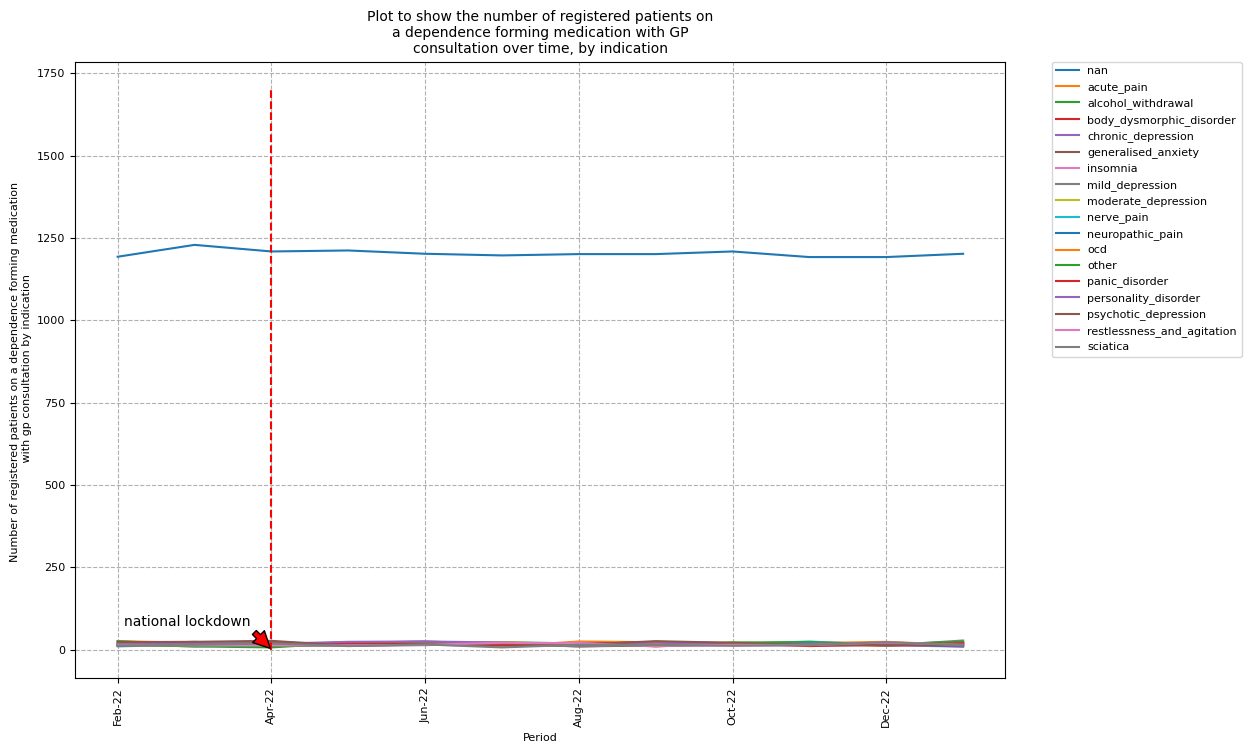

In [3]:
data_measure_gp_consultation_with_indication_rate = pd.read_csv("output/measure_gp_consultation_with_indication_rate.csv", parse_dates=["date"])
data_measure_gp_consultation_with_indication_rate = data_measure_gp_consultation_with_indication_rate.loc[data_measure_gp_consultation_with_indication_rate["with_consultation"] == 1, :]
df_measure_gp_consultation_with_indication_rate = pd.DataFrame.pivot(data_measure_gp_consultation_with_indication_rate, index='date', columns='indication', values='research_population')
df_measure_gp_consultation_with_indication_rate.index = pd.to_datetime(df_measure_gp_consultation_with_indication_rate.index).strftime('%b-%y')
ax = df_measure_gp_consultation_with_indication_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \n with gp consultation by indication', fontsize=8)
ax.vlines(
        x=2, # remember to update index
        ymin=0,
        ymax=1700,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by indication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig("output/measure_gp_consultation_with_indication_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



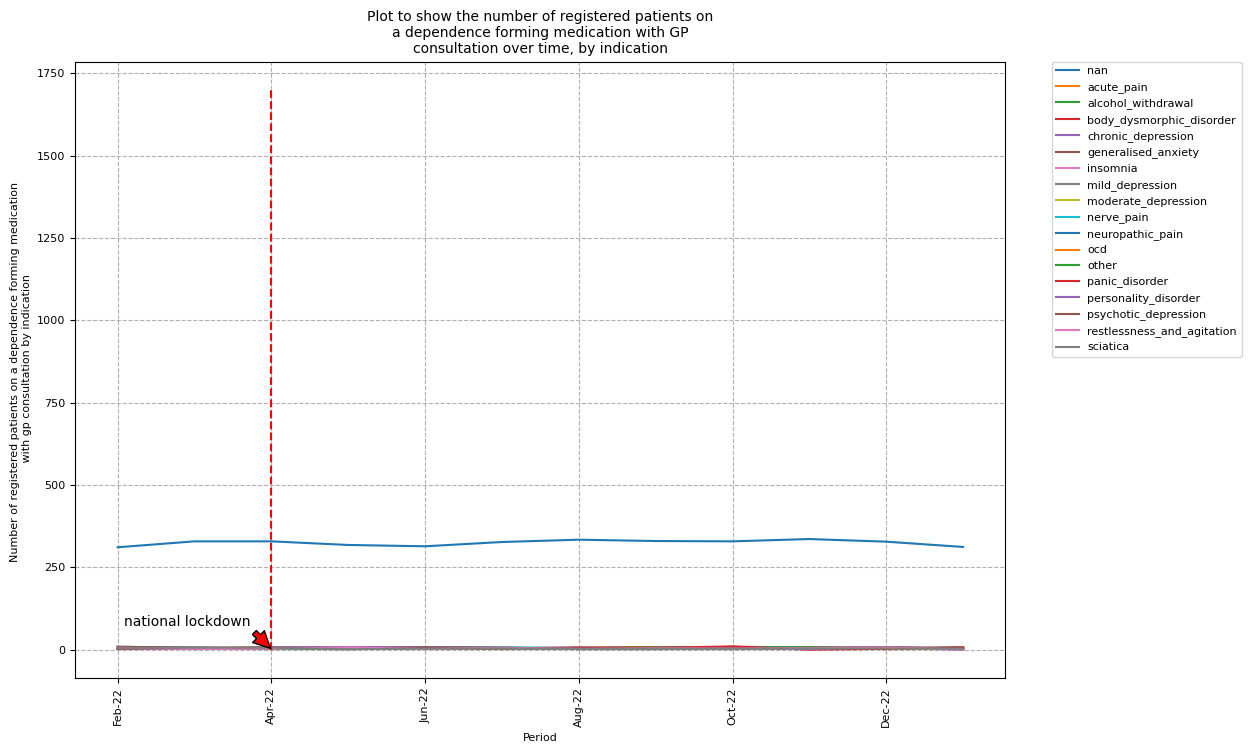

In [4]:
data_measure_social_prescribing_with_indication_rate = pd.read_csv("output/measure_social_prescribing_with_indication_rate.csv", parse_dates=["date"])
data_measure_social_prescribing_with_indication_rate = data_measure_social_prescribing_with_indication_rate.loc[data_measure_social_prescribing_with_indication_rate["with_social_prescribing"] == 1, :]
df_measure_social_prescribing_with_indication_rate = pd.DataFrame.pivot(data_measure_social_prescribing_with_indication_rate, index='date', columns='indication', values='research_population')
df_measure_social_prescribing_with_indication_rate.index = pd.to_datetime(df_measure_social_prescribing_with_indication_rate.index).strftime('%b-%y')
ax = df_measure_social_prescribing_with_indication_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \n with gp consultation by indication', fontsize=8)
ax.vlines(
        x=2, # remember to update index
        ymin=0,
        ymax=1700,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by indication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig("output/measure_social_prescribing_with_indication_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

